<a href="https://colab.research.google.com/github/FemiAdesola/Data-Science/blob/main/Operations_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <ins>**THE DATA SCIENCE FOR BUSINESS**



<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Classifying disease using Deep Learning
  </td></tr>
</table>


# <ins>**Operation Departmet**
+ Al/ML/DL has been revolutionizing healthcare and medicine:
  + Medical imagery
  + Drug research
  + Genome development

+ Deep learning has been proven to be superior in detecting and classifying disease using imagery data.

+ Skin cancer could be detected more accurately by
Deep Learning than by dermatologists (2018).
  + Human dermatologists detection = 86.6%
  + Deep Learning detection = 95%

  Reference: "Computer learns to detect skin cancer more accurately than doctors". The Guardian. 29 May 2018

# <ins>**Case study**
+ In this case study, we will assume that you work as a
Deep Learning Consultant.
+ You have been hired by a hospital in downtown
Toronto and you have been tasked to automate the process of detecting and classifying chest disease and reduce the cost and time of detection.
+ The team has collected extensive X-Ray chest data and they approached you to develop a model that could detect and classify the diseases in less than 1 minute.
+ You have been provided with 133 images that belong
to 4 classes:
  + Healthy
  + Covid-19
  + Bacterial Pneumonia
  + Viral Pneumonia

# <ins>**IMPORT LIBRARIES AND DATASET**

In [1]:
# This is a custom dataset that contains covid-19 x-ray images, viral pneumonia x-ray images, bacterial pneumonia x-ray iamges and normal person x-ray images.
# Each class contains 133 images.
# Dataset Source:
# https://github.com/ieee8023/covid-chestxray-dataset
# https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# For mounting the drive:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Specify training data directory
XRay_Directory = '/content/drive/My Drive/Colab Notebooks/Chest_X_Ray'


In [4]:
# List the folders in the directory
os.listdir(XRay_Directory)

['.DS_Store', '2', '3', '1', '0']

And within the training data, we will divide it into 80 percent for training and 20 percent for cross-validation.
  + we use cross-validation to make sure that our model is not overfitting the training data.
  + We want the model to be able to generalize, and not memorize.
  + We want the model to see, for example, images of new patients and still work.

In [5]:
# Use image generator to generate tensor images data and normalize them
# Use 20% of the data for cross-validation
image_generator = ImageDataGenerator(rescale = 1./255, validation_split= 0.2) # 0.2 means 20% allocated for validation


## For generating 40 batches of images
  + Total number of images is 133*4 = 532 images
  + Shuffle means change the other of data

In [6]:
# Training is 428 (80%) and validation is 104 (20%)
# Perform shuffling and image resizing

train_generator = image_generator.flow_from_directory(batch_size = 40, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode = 'categorical', subset="training")


Found 428 images belonging to 4 classes.


In [7]:
# For creating validation generator

validation_generator = image_generator.flow_from_directory(batch_size = 40, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode = 'categorical', subset="validation")

Found 104 images belonging to 4 classes.


In [8]:
# For generating a batch of 40 images and labels
train_images, train_labels = next(train_generator)

In [9]:
train_images.shape

(40, 256, 256, 3)

In [10]:
train_labels.shape

(40, 4)

In [11]:
train_labels

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]],

+ Classes
    + Healthy
    + Covid-19
    + Viral Pneumonia
    + Bacterial Pneumonia
  
  
  This array shows the position of each class, for example 0 means absence of the class and  1 means present


In [12]:
# labels Translator
# labels Translator
label_names = {0 : 'Covid-19', 1 : 'Normal' , 2: 'Viral Pneumonia', 3 : 'Bacterial Pneumonia'}

# <ins>**VISUALIZE DATASET**

For Createing a grid of 36 images along with their corresponding labels
  + Length of 6
  + Width of 6

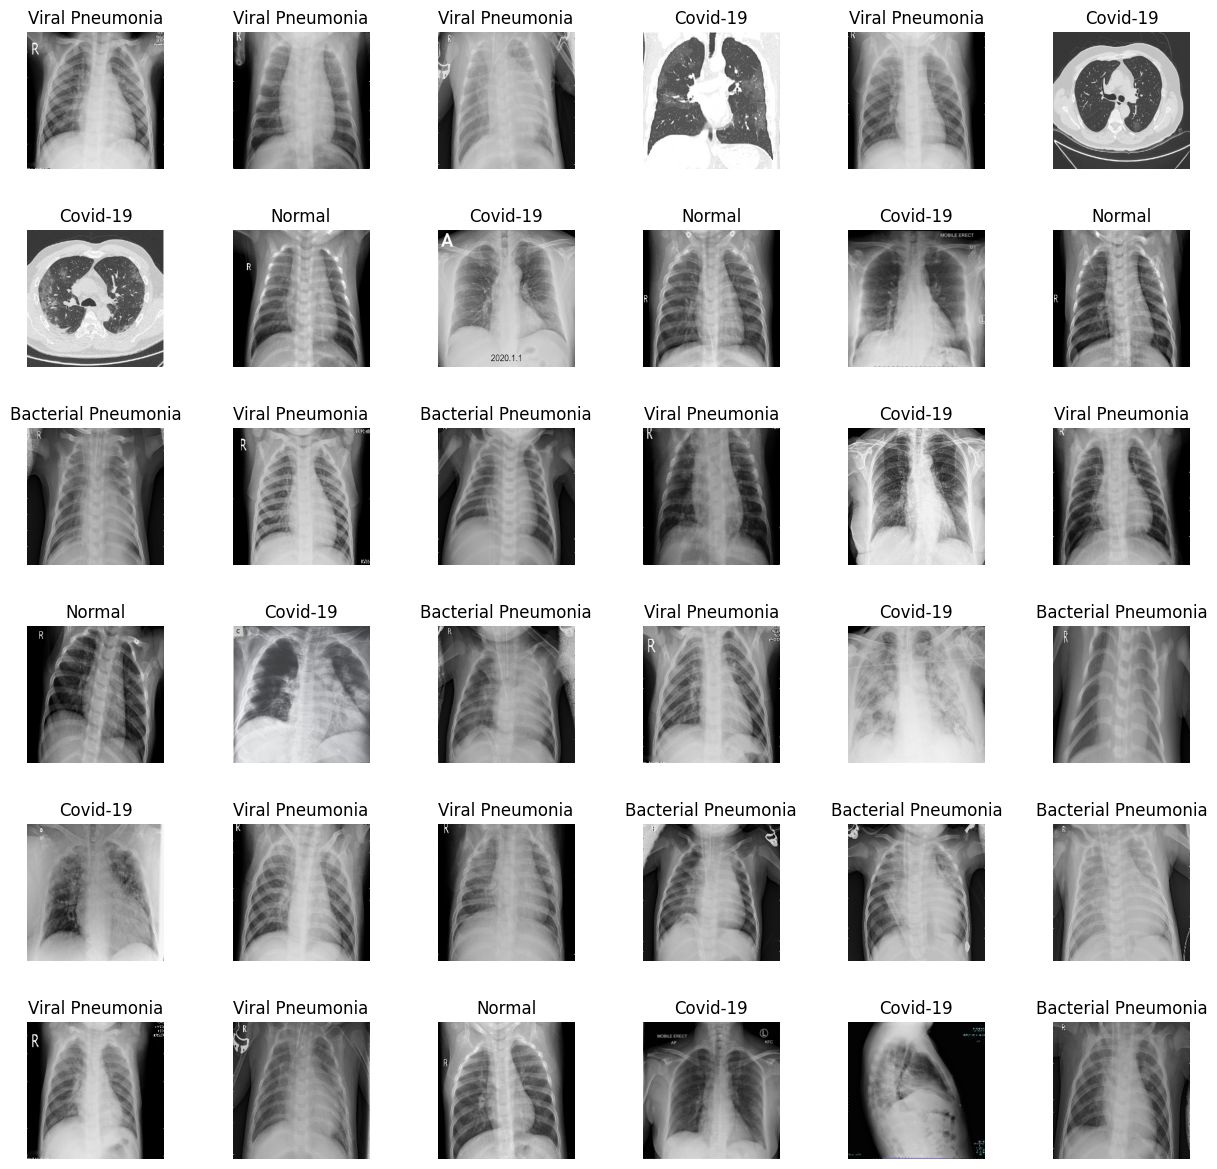

In [13]:
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize = (15, 15))
axes = axes.ravel() # ravel is used to flatten the axis

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off') # For gettng rid of axis

plt.subplots_adjust(wspace = 0.5)  # For adjusting space

# <ins>**UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS**

<ins>**CONVOLUTIONAL NEURAL NETWORKS**
+ The first CNN layers are used to extract high level general features.
+  The last couple of layers are used to perform classification (on a specific task).
+ Local respective fields scan the image first searching for simple shapes such as edges/lines
+ These edges are then picked up by the subsequent layer to form more complex features.

![alt text](https://drive.google.com/uc?id=1340UvqbXc-sy6cIuVg7ZbOwcga2JxfkP)

# <ins>**DEEP LEARNING HISTORY**
+ There are many trained off the shelve convolutional neural networks that are readily available such as:
  + **LeNet-5 (1998)**: 7 level convolutional neural network developed by LeCun that works in classifying hand writing numbers.
  + **AlexNet (2012)**: Offered massive improvement, error reduction from 26% to 15.3%
  + **ZFNEt (2013)**: achieved error of 14.8%
  + **Googlenet/Inception (2014**): error reduction to 6.67% which is at par with human level accuracy.
  + **VGGNet (2014)**
  + **ResNet (2015)**: Residual Neural Network includes "skip connection" feature and therefore enabled training of 152 layers without vanishing gradient issues. Error of 3.57% which is superior than humans.

  Data Source: https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5
  

![alt text](https://drive.google.com/uc?id=1nt8iX7H2LEhaWgGCi_NIb05DMQEoJVfI)

# <ins>**UNDERSTAND THE THEORY AND INTUITION BEHIND TRANSFER LEARNING**

<ins>**WHAT IS TRANSFER LEARNING?**

+ Transfer learning is a machine learning technique in which a network that has been trained to perform a specific task is being reused (repurposed) as a starting point for another similar task.
+ Transfer learning is widely used since starting from a pre-trained models can dramatically reduce the computational time required if training is performed from scratch.
+ "Transfer learning is the improvement of learning in a new task through the transfer of knowledge from a related task that has already been learned"-Transfer Learning, Handbook of Research on Machine Learning Applications, 2009.
+  In transfer learning, a base (reference) Artificial Neural Network on a base dataset and function is being trained.
Then, this trained network weights are then repurposed in a second ANN to be trained on a new dataset and function.
+ Transfer learning works great if the features are general, such that trained weights can effectively repurposed.
+  Intelligence is being transferred from the base network to the newly target network.

![alt text](https://drive.google.com/uc?id=14niGb232X6l8OD1dMT4a_u3fjh_jKuMS)

![alt text](https://drive.google.com/uc?id=1dye4zWALCDu8a1a-58HfZk4On4nVuizV)

# <ins>**IMPORT MODEL WITH PRETRAINED WEIGHTS**

In [14]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256,256,3))) # Input shape most equal to the size or number of image

In [15]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [16]:
# freezing layers in the model
for layer in basemodel.layers[:-10]: # For keeping the last ten layers
  layers.trainable = False # This line stop the train

# <ins>**BUILD AND TRAIN DEEP LEARNING MODEL**

In [17]:
# For creating the head model
headmodel = basemodel.output

In [18]:
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel) # For avoiding overfitting by drop 30%
headmodel = Dense(128, activation = "relu")(headmodel)
headmodel = Dropout(0.2)(headmodel) # For avoiding overfitting by drop 30%
headmodel = Dense(4, activation = 'softmax')(headmodel)

In [19]:
# For combining the model
model = Model(inputs = basemodel.input, outputs = headmodel)

In [20]:
# For compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate = 1e-4), metrics= ["accuracy"])

In [21]:
# using early stopping to exit training if validation loss is not decreasing after certain number of epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True) # save the best model with lower validation loss


In [22]:
train_generator = image_generator.flow_from_directory(batch_size = 4, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset="training")

Found 428 images belonging to 4 classes.


In [23]:
validation_generator = image_generator.flow_from_directory(batch_size = 4, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset="validation")

Found 104 images belonging to 4 classes.


In [24]:
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 4, epochs = 10, validation_data = validation_generator , validation_steps= validation_generator.n // 4, callbacks=[checkpointer, earlystopping])

Epoch 1/10
107/107 [==============================] - ETA: 0s - loss: 0.8091 - accuracy: 0.7150
Epoch 1: val_loss improved from inf to 4.39221, saving model to weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


107/107 [==============================] - 507s 5s/step - loss: 0.8091 - accuracy: 0.7150 - val_loss: 4.3922 - val_accuracy: 0.2500
Epoch 2/10
107/107 [==============================] - ETA: 0s - loss: 0.4358 - accuracy: 0.8435
Epoch 2: val_loss did not improve from 4.39221
107/107 [==============================] - 474s 4s/step - loss: 0.4358 - accuracy: 0.8435 - val_loss: 8.7469 - val_accuracy: 0.2500
Epoch 3/10
107/107 [==============================] - ETA: 0s - loss: 0.2838 - accuracy: 0.9229
Epoch 3: val_loss improved from 4.39221 to 3.93753, saving model to weights.hdf5
107/107 [==============================] - 474s 4s/step - loss: 0.2838 - accuracy: 0.9229 - val_loss: 3.9375 - val_accuracy: 0.2500
Epoch 4/10
107/107 [==============================] - ETA: 0s - loss: 0.2297 - accuracy: 0.9369
Epoch 4: val_loss did not improve from 3.93753
107/107 [==============================] - 470s 4s/step - loss: 0.2297 - accuracy: 0.9369 - val_loss: 6.8448 - val_accuracy: 0.2500
Epoch 5/1

# <ins>**EVALUATE TRAINED DEEP LEARNING MODEL**

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

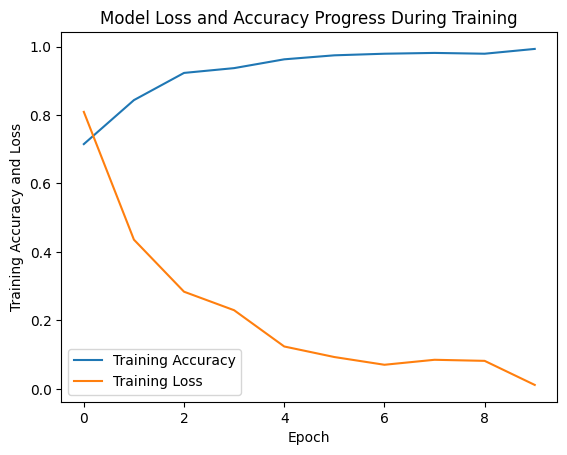

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss'])

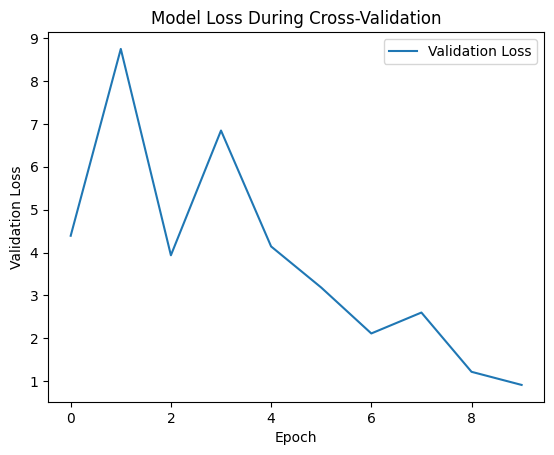

In [27]:
plt.plot(history.history['val_loss'])
plt.title('Model Loss During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(['Validation Loss'])

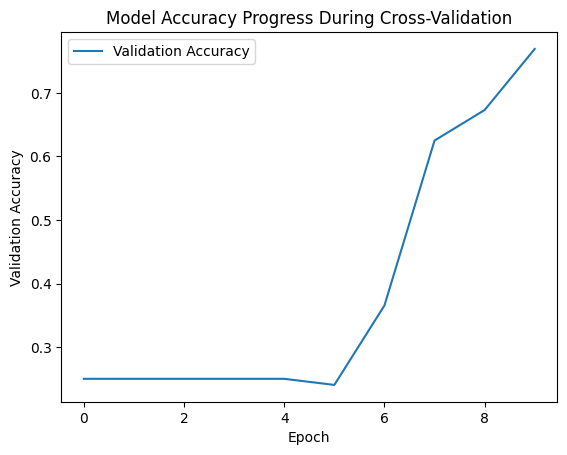

In [28]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'])

## For import Test file

In [29]:
test_directory = '/content/drive/My Drive/Colab Notebooks/Test'

In [30]:
test_gen = ImageDataGenerator(rescale = 1./255)

test_generator = test_gen.flow_from_directory(batch_size = 40, directory= test_directory, shuffle= True, target_size=(256,256), class_mode= 'categorical')

evaluate = model.evaluate(test_generator, steps = test_generator.n // 4, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

Found 40 images belonging to 4 classes.
 1/10 [==>...........................] - ETA: 2:44 - loss: 1.7866 - accuracy: 0.6250

10/10 [==============================] - 18s 25ms/step - loss: 1.7866 - accuracy: 0.6250
Accuracy Test : 0.625


In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory,str(i))):
    img= cv2.imread(os.path.join(test_directory,str(i),item))
    img = cv2.resize(img,(256,256))
    image.append(img)
    img = img / 255
    img = img.reshape(-1,256,256,3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

1/1 [==============================] - 0s 472ms/step


In [38]:
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.625


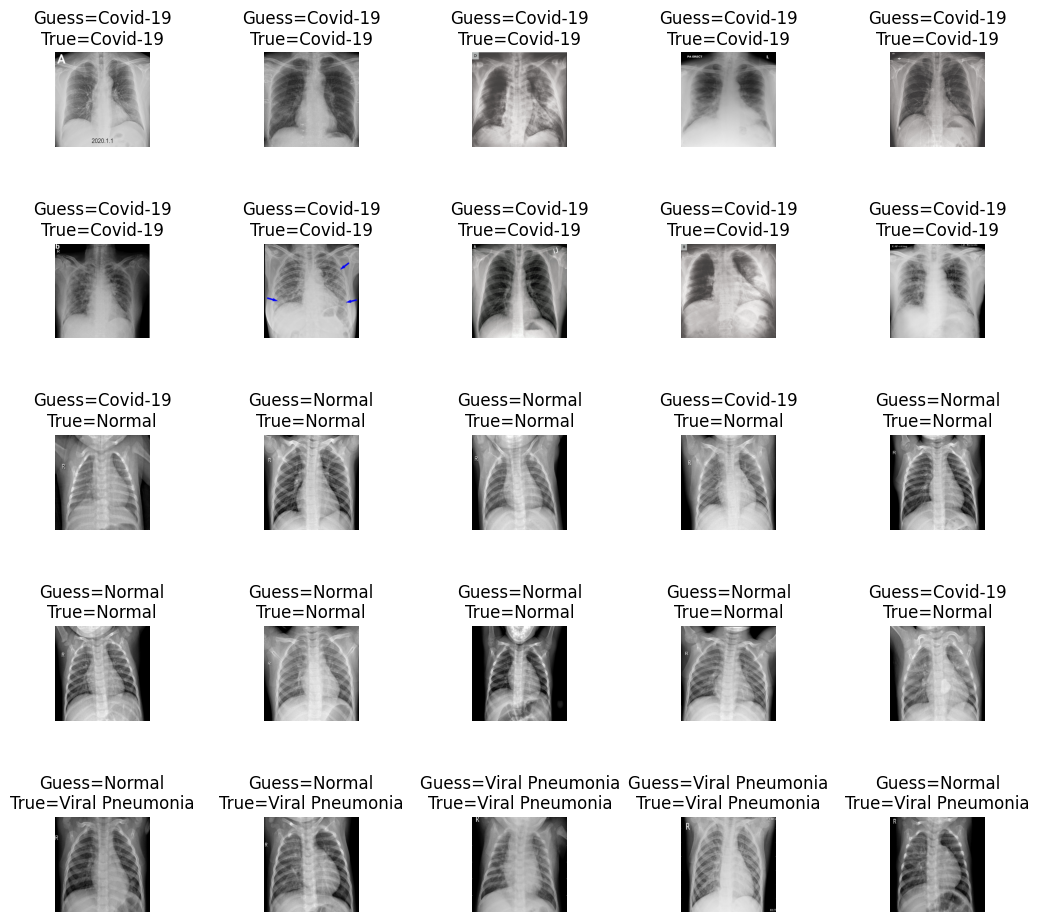

In [39]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2)

In [40]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       0.50      0.70      0.58        10
           2       0.71      0.50      0.59        10
           3       0.75      0.30      0.43        10

    accuracy                           0.62        40
   macro avg       0.66      0.62      0.60        40
weighted avg       0.66      0.62      0.60        40



**For heatmap**

Text(0.5, 1.0, 'Confusion_matrix')

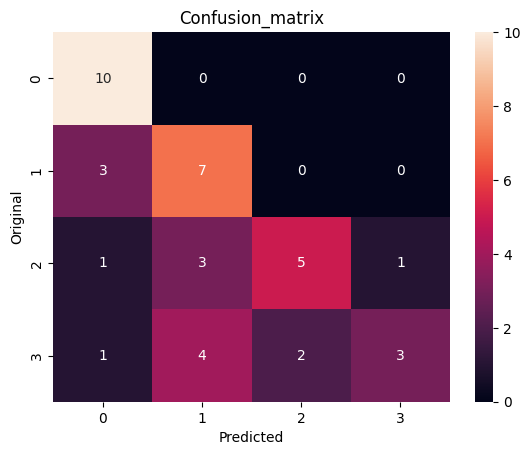

In [41]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')